In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys

In [3]:
sys.path.append('../')

In [4]:
%load_ext autoreload
%autoreload 1

In [5]:
%aimport collect_l1b
c = collect_l1b

In [6]:
import xarray as xr
import numpy as np
import satpy
import pandas as pd

In [7]:
import os

In [8]:
os.environ['XRIT_DECOMPRESS_PATH'] = '/data/cphillips/isccp-ng/isccp_l1g_prototype/xrit/PublicDecompWT/xRITDecompress/xRITDecompress'

In [9]:
from pathlib import Path

In [10]:
dt = datetime.datetime(2020,10,1)

In [87]:
pdb

Automatic pdb calling has been turned ON


In [94]:
*_, hrit = c.get_all_fd(datetime(2020,10,1), datetime(2020,10,1,0,10))

In [115]:
hrit.groupby('band').size().index

Index(['', 'IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120',
       'IR_134', 'VIS006', 'VIS008', 'WV_062', 'WV_073'],
      dtype='object', name='band')

In [116]:
name = 'IR_087'

In [117]:
files_sub = hrit.loc[[name,'']].tolist()

In [118]:
s = satpy.Scene(files_sub, reader='seviri_l1b_hrit')

In [119]:
import warnings

In [120]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    s.load([name])

In [121]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    v = s[name]
    proj = v.area.to_cartopy_crs()

In [127]:
for name in hrit.groupby('band').size().index:
    if name != '':
        files_sub = hrit.loc[[name,'']].tolist()
        s = satpy.Scene(files_sub, reader='seviri_l1b_hrit')
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            s.load([name])
            v = s[name]
            print(name, v.shape)

IR_016 (3712, 3712)
IR_039 (3712, 3712)
IR_087 (3712, 3712)
IR_097 (3712, 3712)
IR_108 (3712, 3712)
IR_120 (3712, 3712)
IR_134 (3712, 3712)
VIS006 (3712, 3712)
VIS008 (3712, 3712)
WV_062 (3712, 3712)
WV_073 (3712, 3712)


Text(0.5, 1.0, '')

/data/cphillips/miniconda3/envs/dev/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


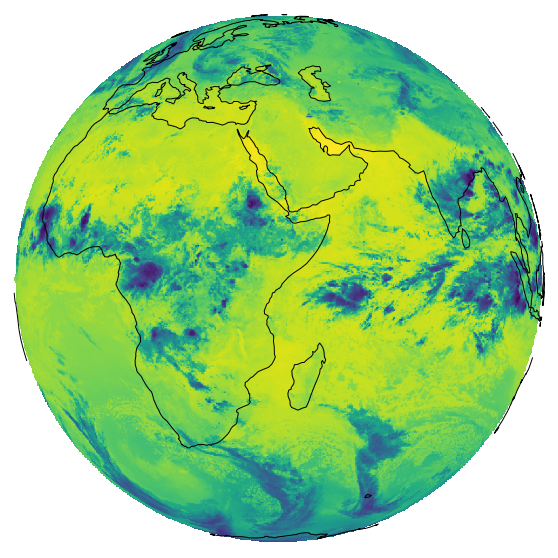

In [33]:
extent = [*v.x.values[[0,-1]], *v.y.values[[-1,0]]]
figure(figsize=(12,10))
ax = axes(projection=proj)
ax.imshow(v[::8,::8].values, transform=proj, extent=extent)
xlim(sorted(extent[:2]))
ylim(sorted(extent[2:]))
ax.coastlines()
title('')